# Analyze after each EXP

## 1. rating distribution, basic info, axis distribution, etc

mean: 0.1381
max: 0.3744
min: 0.0003
std: 0.2056
count: 3


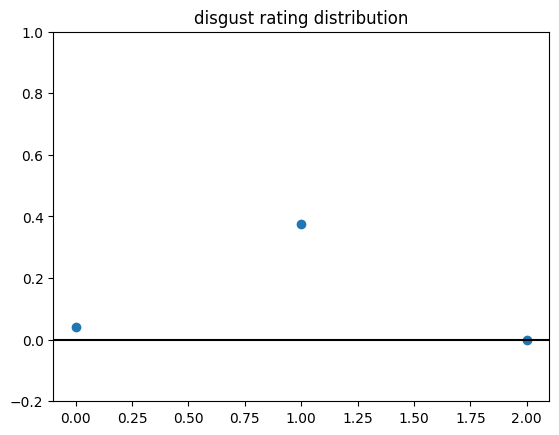

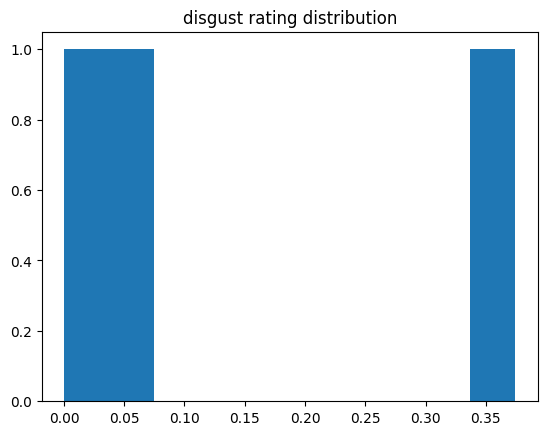

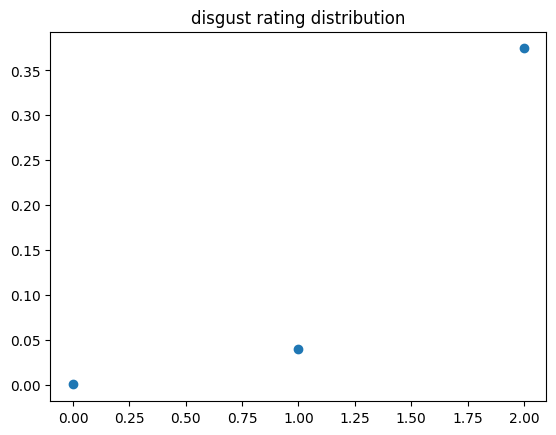

In [18]:
# rating distribution, basic info
import os
import pandas as pd
def get_rating_dist(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, target_emo, img)
        csvname = test.split('.png')[0] + '_emotion.csv'
        tmp = pd.read_csv(csvname)
        res.append(float(tmp[target_emo]))

    print('mean:', round(sum(res)/len(res), 4))
    print('max:', round(max(res), 4))
    print('min:', round(min(res), 4))
    print('std:', round(pd.Series(res).std(), 4))
    print('count:', len(res))

    # scatter plot the distribution
    import matplotlib.pyplot as plt
    # set fig y axis range 0 1
    plt.ylim(-0.2, 1)
    plt.scatter(range(len(res)), res)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the histogram
    plt.hist(res, bins=10)
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the scatter plot in sorted order
    res.sort()
    plt.scatter(range(len(res)), res)
    plt.title(target_emo + ' rating distribution')
    plt.show()
    

fold_name = 'image_analysis'
target_emo = 'disgust'
get_rating_dist(fold_name, target_emo)

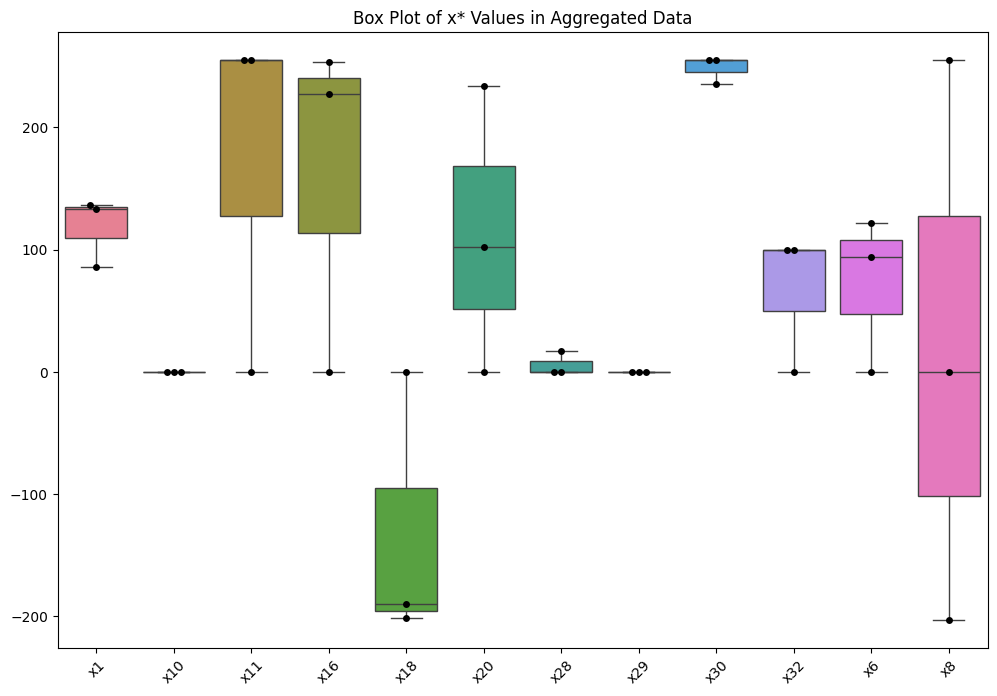

In [15]:
# axis distribution

def get_axis_dist_figure(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo)) if 'png' in x]
    aggregated_data = pd.DataFrame()
    for img in images:
        test = os.path.join(fold_name, target_emo, img)
        csvname = test.split('.png')[0] + '_output_and_axes.csv'
        tmp = pd.read_csv(csvname)
        aggregated_data = pd.concat([aggregated_data, tmp], ignore_index=True)

    # Verify the aggregation by checking the shape and first few rows
    aggregated_data.shape, aggregated_data.head()

    # draw the box plot with scatter plot
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=aggregated_data.drop(columns='rating'))
    sns.swarmplot(data=aggregated_data.drop(columns='rating'), color='black')
    plt.xticks(rotation=45)
    plt.title("Box Plot of x* Values in Aggregated Data")
    plt.show()

get_axis_dist_figure(fold_name, target_emo)

## 2. different rating distributions

In [ ]:
# 

## 3. visualize figures by ratings order

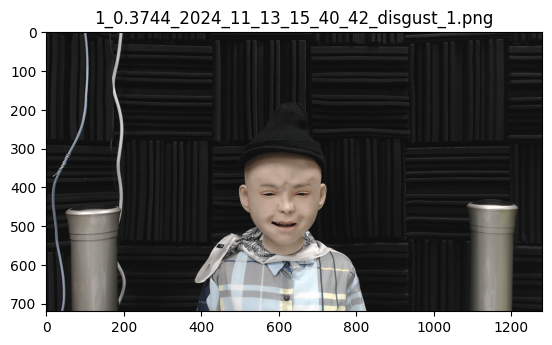

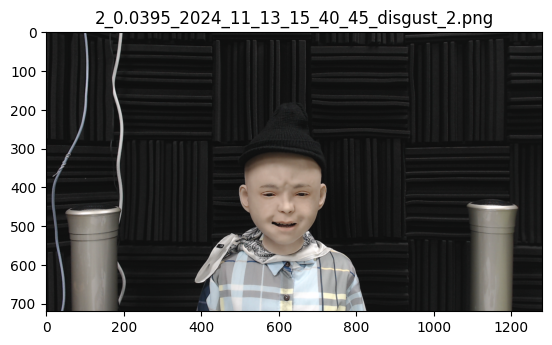

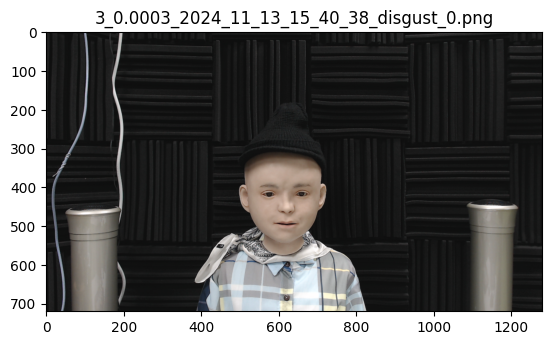

In [28]:
import shutil
def get_png_rating_pairs(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, target_emo, img)
        csvname = test.split('.png')[0] + '_emotion.csv'
        tmp = pd.read_csv(csvname)
        res.append(float(tmp[target_emo]))
    return list(zip(images, res))

# put the top 30 images in a subfolder with the ranking in the filename

def move_top_images(fold_name, target_emo, top_n):
    test = get_png_rating_pairs(fold_name, target_emo)
    test = sorted(test, key=lambda x: x[1], reverse=True)
    for i in range(top_n):
        # check if the sub folder exists
        if not os.path.exists(os.path.join(fold_name, target_emo, 'top_images')):
            os.makedirs(os.path.join(fold_name, target_emo, 'top_images'))
        # copy to the sub folder named top_images
        shutil.copy(os.path.join(fold_name, target_emo, test[i][0]), os.path.join(fold_name, target_emo, 'top_images', str(i + 1) + '_' + str(round(test[i][1], 4)) + '_' + test[i][0]))
    return None

def show_images_in_subfolder(fold_name, target_emo):
    import matplotlib.pyplot as plt
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo, 'top_images')) if 'png' in x]
    images = sorted(images, key=lambda x: int(x.split('_')[0]))
    for img in images:
        plt.imshow(plt.imread(os.path.join(fold_name, target_emo, 'top_images', img)))
        plt.title(img)
        plt.show()

# usage
sorted_pairs = sorted(get_png_rating_pairs(fold_name, target_emo), key=lambda x: x[1], reverse=True)
move_top_images(fold_name, target_emo, 3)
show_images_in_subfolder(fold_name, target_emo)

## 4. Analyze the ratings for human judged probe images and the top ratings

In [ ]:

filename_order_pairs = get_png_rating_pairs(fold_name, target_emo)
filename_order_pairs.reverse()
print(filename_order_pairs)

# probe should be the first ** files



[('2024_11_13_15_40_38_disgust_0.png', 0.00026482125), ('2024_11_13_15_40_42_disgust_1.png', 0.37437734), ('2024_11_13_15_40_45_disgust_2.png', 0.039546266)]


In [31]:
filename_order_pairs

[('2024_11_13_15_40_45_disgust_2.png', 0.039546266),
 ('2024_11_13_15_40_42_disgust_1.png', 0.37437734),
 ('2024_11_13_15_40_38_disgust_0.png', 0.00026482125)]